# Day 5

Today we want to avoid hydrothermal vents with our submarine. We recieve the start and end of the line in coordinates: x1,y1 -> x2,y2. We want to avoid the most dangerous places where two or more lines overlap.

Task 1: Only consider vertical and horizontal lines.
Task 2: Also consider diagonal lines (45°)

In [85]:
# Reading the input
contents = open('input_day5.txt','r').read().splitlines()
lines = []

# test-list
#contents = ['0,9 -> 5,9','8,0 -> 0,8','9,4 -> 3,4','2,2 -> 2,1','7,0 -> 7,4','6,4 -> 2,0','0,9 -> 2,9','3,4 -> 1,4','0,0 -> 8,8','5,5 -> 8,2']

for c in contents:
    start,end = c.strip().split(" -> ")
    lines.append((start,end))


The number of grid-spots where two or more lines cross is: 21038.


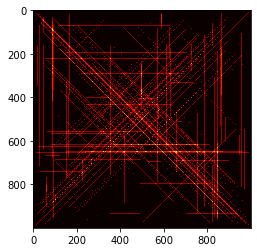

In [87]:
# Initiating grid
import matplotlib.pyplot as plt
import numpy as np
grid = np.zeros((1000,1000))

# line is a list of tuples of the form ('x1,y1','x2,y2')
for line in lines:
    
    x1,y1 = line[0].split(",")
    x2,y2 = line[1].split(",")
    x1,x2,y1,y2 = int(x1),int(x2),int(y1),int(y2)
    #print(f'x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}.')

    # Vertical lines
    if x1 == x2:
        x = x1
        y_start = min([y1,y2])
        y_end = max([y1,y2])
        
        while(y_start <= y_end):
            grid[y_start][x] += 1
            y_start += 1

    # Horizontal lines
    elif y1 == y2:        
        y = y1
        x_start = min([x1,x2])
        x_end = max([x1,x2])

        while(x_start <= x_end):
            grid[y][x_start] += 1
            x_start += 1
    
    # Diagonal lines
    else: 
        x,y = x1,y1

        for i in range(0,np.abs(x1-x2)+1):
            grid[y][x] += 1
            x = x + np.sign(x2-x1)
            y = y + np.sign(y2-y1)
    
    


   
count = 0
for row in grid:
    for coordinate in row:
        #print(f'coordinate: {coordinate}, type: {type(coordinate)}')
        if coordinate > 1:
            count += 1
        #print(count)

print(f"The number of grid-spots where two or more lines cross is: {count}.")

# Some visualization.
plt.imshow(grid, cmap='hot', interpolation='nearest')
plt.show()



